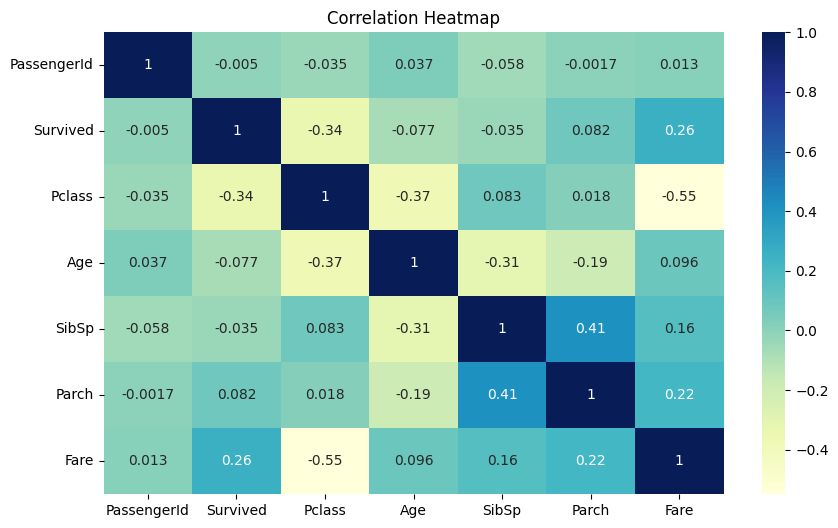

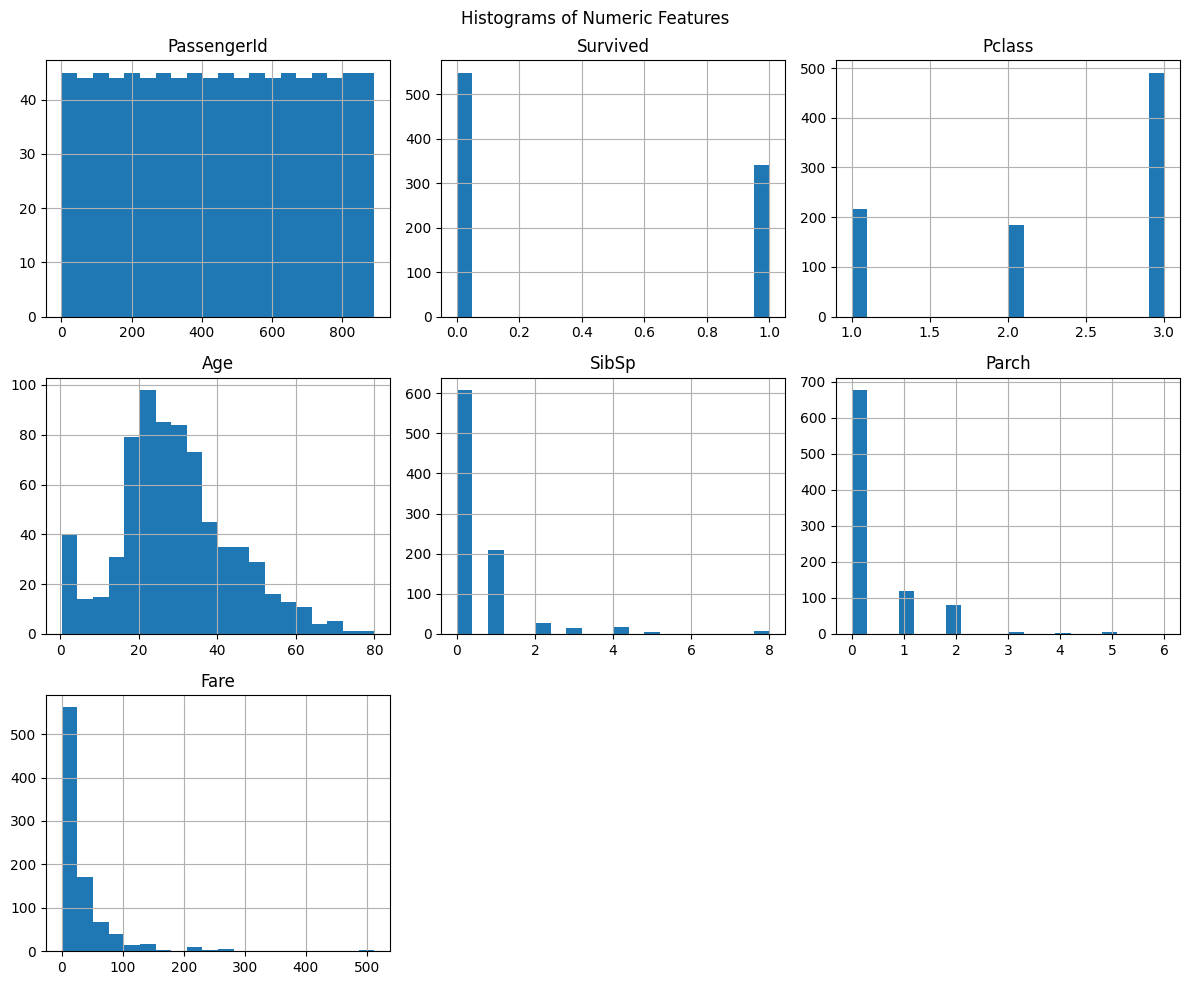

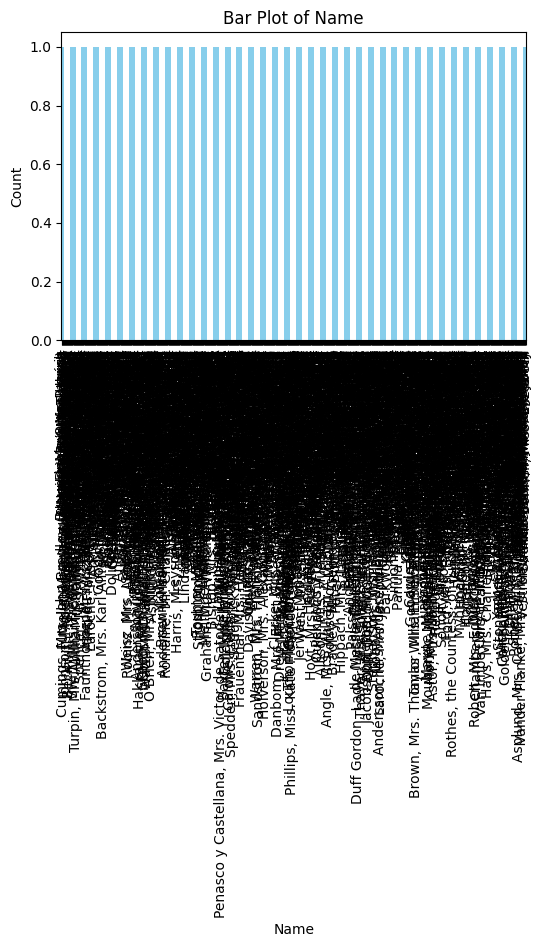

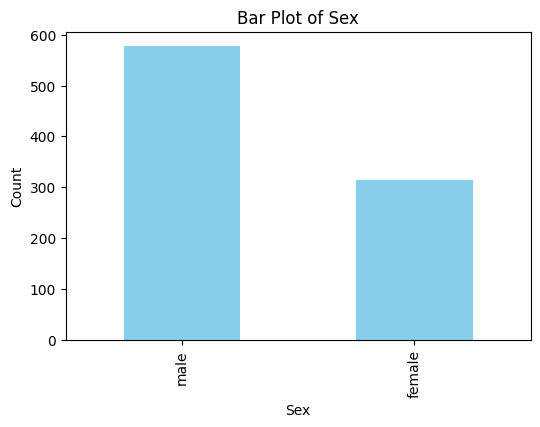

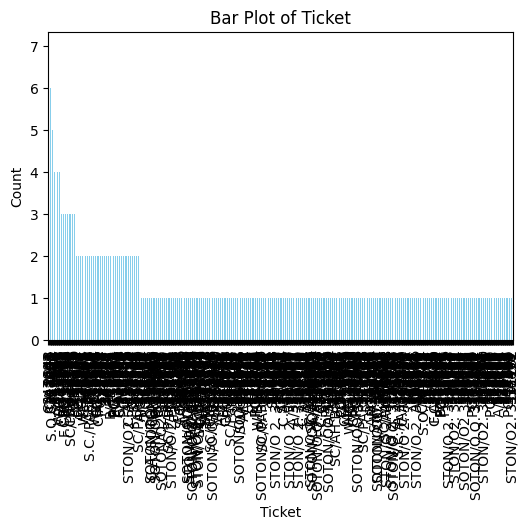

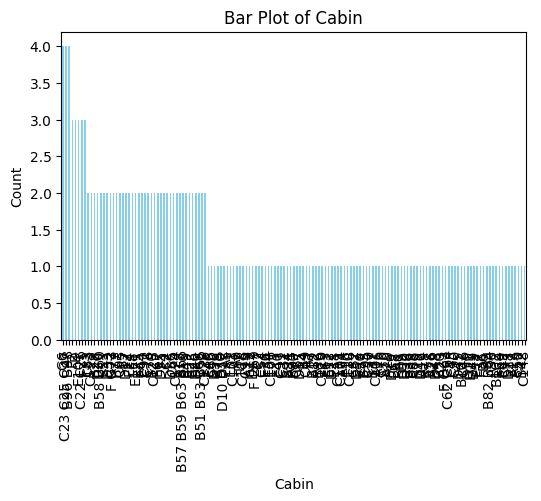

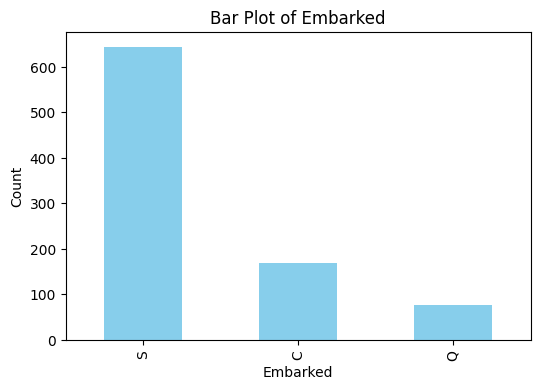

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 100}
Train Accuracy: 0.8300653594771242
Test Accuracy: 0.8156424581005587


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

titanic_data = pd.read_csv("train.csv")

X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()


numeric_data = titanic_data.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


X_final = titanic_data.drop("Survived", axis=1)
y_final = titanic_data["Survived"]
X_final_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_final)



numeric_data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

categorical_cols = titanic_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    titanic_data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Bar Plot of {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()



numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 4, 6]
}

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", grid_search.best_score_)
print("Test Accuracy:", grid_search.score(X_test, y_test))

